Here, we'll look at Baltimore City parking citation data to work through some graphs with seaborn 

In [1]:
import numpy as np #import numpy for data analysis
import pandas as pd #import pandas for data analysis
import seaborn as sns #import seaborn for graphs
import matplotlib.pyplot as plt #import matplotlib to graph
%matplotlib inline #so that our graphs show up automatically

In order to do any data analysis, we need to import our dataset and create a __dataframe__. Our dataset is in a CSV (comma separated value) format that can look like an Excel spreadsheet. We use pandas (imported above) to upload our dataset (originally downloaded from https://data.baltimorecity.gov/Transportation/Parking-Citations/n4ma-fj3m/data ):

In [2]:
#import parking citation dataset and create a dataframe
#download the CSV file from the link above
#make sure to change the file pathname to the file pathname on your computer

df= pd.read_csv('/Users/melanieshimano/Desktop/Parking_Citations.csv', low_memory=False)

In [3]:
#view the top 10 rows of our dataframe
df.head(10)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,85448272,3AC8183,02,13.0,MD,CADI,6100 BLOCK OF OLD HARFORD RD.,33,Mobile Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"6100 BLOCK OF OLD HARFORD RD\nBaltimore, MD\n(..."
1,85444719,8AB6128,09,12.0,MD,ACUR,4200 SINCLAIR LANE W/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"4200 SINCLAIR LANE W\nB Baltimore, MD\n(39.316..."
2,85452209,7EHC21,07,11.0,MD,BUIC,4601 LIBERTY HEIGHTS AVE E/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"4601 LIBERTY HEIGHTS AVE E\nB Baltimore, MD\n(..."
3,85387397,8AC2640,12,12.0,MD,OLDS,6200 WALTHER AVE N/B,32,Fixed Speed Camera,$40.00,...,$65.00,NaN,$40.00,$25.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"6200 WALTHER AVE N\nB Baltimore, MD\n(39.35130..."
4,85397289,06500TT,10,11.0,MD,INTL,4862 ERDMAN AVE W/B,32,Fixed Speed Camera,$40.00,...,$65.00,NaN,$40.00,$25.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"4862 ERDMAN AVE W\nB Baltimore, MD\n(39.307075..."
5,85395333,1FGT79,07,11.0,MD,FORD,5400 PERRING PKWY S/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/13/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"5400 PERRING PKWY S\nB Baltimore, MD\n(39.3539..."
6,85427425,6AA3639,08,12.0,MD,FORD,2900 ORLEANS ST. E/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"2900 ORLEANS ST E\nB Baltimore, MD\n(39.295874..."
7,85408532,2ELH79,10,12.0,MD,HOND,3600 NORTHERN PARKWAY W/B,32,Fixed Speed Camera,$40.00,...,$65.00,NaN,$40.00,$25.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"3600 NORTHERN PARKWAY W\nB Baltimore, MD\n(39...."
8,85423218,7AA0320,07,12.0,MD,TOYT,2900 ORLEANS ST. E/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,04/20/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"2900 ORLEANS ST E\nB Baltimore, MD\n(39.295874..."
9,85365674,8FMN05,07,12.0,MD,TOYT,2900 ORLEANS ST. E/B,32,Fixed Speed Camera,$40.00,...,$40.00,NaN,$40.00,$0.00,03/30/2011,05/07/2013 10:41:00 AM,NaN,NaN,NaN,"2900 ORLEANS ST E\nB Baltimore, MD\n(39.295874..."


As we can see, this gives us a lot of information about the parking citations in Baltimore City. To see all of the column headers (data labels) and give us a better idea of what data we're looking at, we can look at a list of the colum headers with

In [4]:
column_names=df.columns.tolist()
column_names

['Citation',
 'Tag',
 'ExpMM',
 'ExpYY',
 'State',
 'Make',
 'Address',
 'ViolCode',
 'Description',
 'ViolFine',
 'ViolDate',
 'Balance',
 'PenaltyDate',
 'OpenFine',
 'OpenPenalty',
 'NoticeDate',
 'ImportDate',
 'Neighborhood',
 'PoliceDistrict',
 'CouncilDistrict',
 'Location']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023638 entries, 0 to 2023637
Data columns (total 21 columns):
Citation           int64
Tag                object
ExpMM              object
ExpYY              float64
State              object
Make               object
Address            object
ViolCode           int64
Description        object
ViolFine           object
ViolDate           object
Balance            object
PenaltyDate        float64
OpenFine           object
OpenPenalty        object
NoticeDate         object
ImportDate         object
Neighborhood       object
PoliceDistrict     object
CouncilDistrict    float64
Location           object
dtypes: float64(3), int64(2), object(16)
memory usage: 324.2+ MB


In [6]:
df['ViolDate'] = pd.to_datetime(df['ViolDate'])

In [7]:
#make columns that list year, month, day, date, and hour of each parking citation

df['year']=df.ViolDate.dt.year #makes a new column with only the year
df['month']=df.ViolDate.dt.month #makes a new column with only the month
df['date']=df.ViolDate.dt.date #makes a new column with only the date
df['hour']=df.ViolDate.dt.hour #makes a new column with only the hour
df['day_number']=df.ViolDate.dt.dayofweek #makes a new column with only the day of the week number (0=Sunday, 6=Saturday)
df['day_name']=df.ViolDate.dt.weekday_name #make a new columns with the weekday name
df['time']=df.ViolDate.dt.time #make a new columns with the time

In [8]:
df.head()

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,PoliceDistrict,CouncilDistrict,Location,year,month,date,hour,day_number,day_name,time
0,85448272,3AC8183,02,13.0,MD,CADI,6100 BLOCK OF OLD HARFORD RD.,33,Mobile Speed Camera,$40.00,...,NaN,NaN,"6100 BLOCK OF OLD HARFORD RD\nBaltimore, MD\n(...",2011.0,3.0,2011-03-14,10.0,0.0,Monday,10:57:00
1,85444719,8AB6128,09,12.0,MD,ACUR,4200 SINCLAIR LANE W/B,32,Fixed Speed Camera,$40.00,...,NaN,NaN,"4200 SINCLAIR LANE W\nB Baltimore, MD\n(39.316...",2011.0,3.0,2011-03-14,11.0,0.0,Monday,11:52:00
2,85452209,7EHC21,07,11.0,MD,BUIC,4601 LIBERTY HEIGHTS AVE E/B,32,Fixed Speed Camera,$40.00,...,NaN,NaN,"4601 LIBERTY HEIGHTS AVE E\nB Baltimore, MD\n(...",2011.0,3.0,2011-03-14,14.0,0.0,Monday,14:54:00
3,85387397,8AC2640,12,12.0,MD,OLDS,6200 WALTHER AVE N/B,32,Fixed Speed Camera,$40.00,...,NaN,NaN,"6200 WALTHER AVE N\nB Baltimore, MD\n(39.35130...",2011.0,3.0,2011-03-08,9.0,1.0,Tuesday,09:21:00
4,85397289,06500TT,10,11.0,MD,INTL,4862 ERDMAN AVE W/B,32,Fixed Speed Camera,$40.00,...,NaN,NaN,"4862 ERDMAN AVE W\nB Baltimore, MD\n(39.307075...",2011.0,3.0,2011-03-08,17.0,1.0,Tuesday,17:18:00


Now that we've organized some of our data, we can create some visuals to get an idea of what this data tells us. We have a lot of numbers and a lot of different columns--what are some ways that we might want to categorize the data? What are some questions that we want to answer with the data? What will be the best way to show this?

# Making a Bar Graph

__Bar graphs__ are helpful because we can quickly group our data into categories and compare these groups in a picture-like format. This gives us a fast way to compare different groups (example: how many of each car model received parking violations) or trends across the same group (example: how many Toyotas received parking violations every year?). 
<br><br>
We can easily make a bar graph with the __seaborn__ package that we installed above with the following:

Text(0.5,1,'Number of Cars that Received Parking Citations by Make in Baltimore City, 2016')

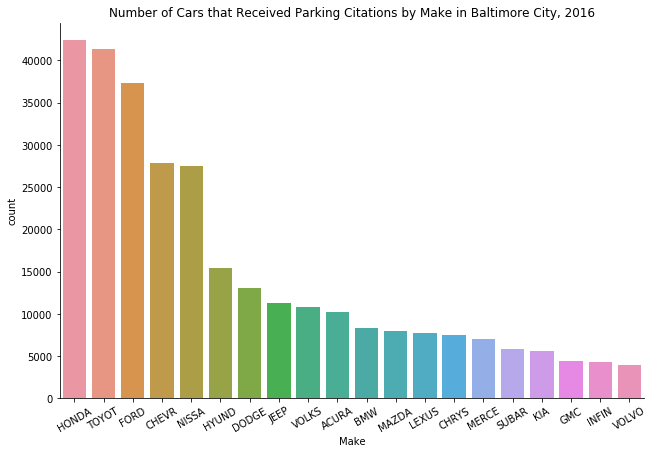

In [9]:
df_16 = df[df['year']==2016] #creating a new dataframe with only the 2016 parking violation data

#a seaborn factorplot will automatically count the number of items in each category and plot it for us in a bar graph

g=sns.factorplot(x='Make', #here we define the x-axis with the Column Title; here we're looking at the number of each Make
               data=df_16, #here we define which dataset we are going to use (we created a new dataset above with only 2016 data)
               kind='count', #this is the kind of factorplot we're going to make--counting the number in each category
               order=df_16.Make.value_counts().iloc[:20].index, #here we say that we're only going to plot the top 20 categories 
                 #try to make this graph without the above line to see why we'd do this!
               size=6, #here we resize the graph so that we can see the results better
               aspect=1.5) #play around with the size and aspect to see what might show the data the best!

g.set_xticklabels(rotation=30) #here we rotate the x-axis labels so that we can read the names
plt.title('Number of Cars that Received Parking Citations by Make in Baltimore City, 2016') #here we add a title for the graph

What does this bar graph tell us about the parking citations issued in 2016? Who would want to know this information? What additional data might we want to compare and look at to come up with findings?

## What other categories can we make a count bar chart with?

Copy and paste the above cell to make a bar chart with new category information:

In [10]:
#Copy, paste, and edit the code below to make your own bar chart:





# Making a Line Graph

__Line graphs__ are helpful because we are able to see trends across our data (example: do the number of citations change throughout a given year or month?).
<br><br>
We can easily make line graphs in __seaborn__ with the following:

Text(0.5,1,'Number of Parking Citations Per Year in Baltimore City')

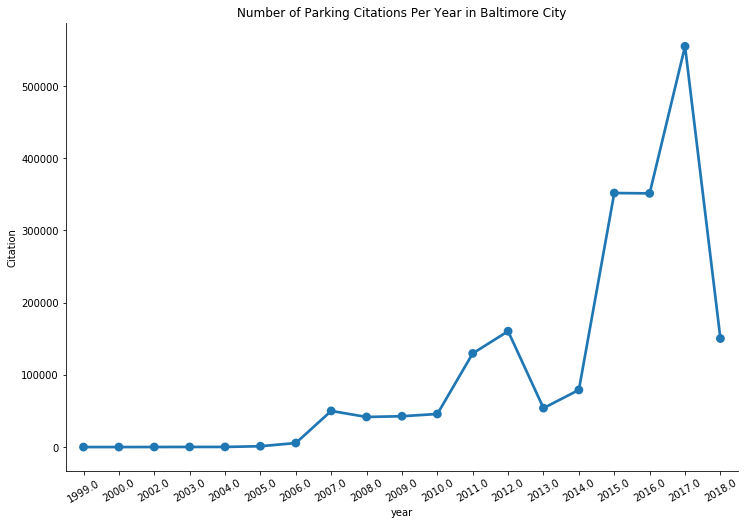

In [11]:
#first, we'll make a new dataframe with our data that counts and combines the number of citations recorded each year

year_count = df.groupby('year', as_index=False).agg({"Citation": "count"})

#then we'll make a line graph that plots the year on the x-axis and the count on the y-axis
#the trend line will give us an idea of how the number of citations changes from year to year
l = sns.factorplot(data=year_count, #we're using the new dataset from above
                   x='year', #our x-axis is the year column
                   y='Citation', #our y-axis is the Citation count column
                   size=7, aspect=1.5) #we re-size the plot size to see it better

l.set_xticklabels(rotation=30) #here we rotate the x-axis labels so that we can read the names
plt.title('Number of Parking Citations Per Year in Baltimore City') #here we add a title for the graph

What does this plot tell us about the data? Why might there be a huge increase in parking citations starting in 2015?

## What other parts of our data can we compare in line graph trends?

Copy and paste the above cell to make a heatmap chart with new category information:

In [12]:
#Copy, paste, and edit the code below to make your own heatmap chart:





# Making a Heatmap

__Heatmaps__ are helpful because we can see a distribution by volume in a given dataset. This can help us get a big-picture view of concentrated and non-concentrated pockets of information (example: which days of the week had the most citations given each year?) 
<br><br>
We can easily make scatterplots in __seaborn__ with the following:

In [13]:
#we're going to create a heatmap to compare the number of citations in each day-of-the-week/year combination
#to see if citations are handed out more frequently on any day of the week 

#create a new dataframe that includes the year and day of week, and add a new column that counts the number of 
#citations in that day-year combination
heatmap_data= df.groupby(['year', 'day_name']).size().reset_index(name='counts') 

#make a list of the years that we want to look at
years=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

#filter the data so that we only include info from the dataframe in our list of years
heatmap_data = heatmap_data.loc[heatmap_data['year'].isin(years)]

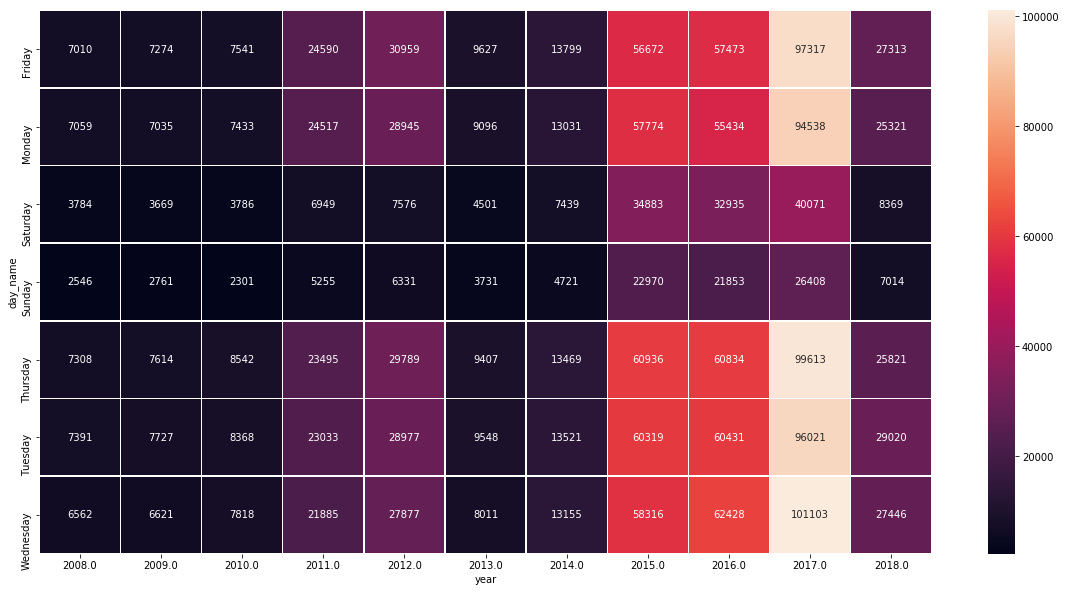

In [14]:
#reframe the data so that it looks like the heatmap
#(type out data in a new cell and run it to see what this looks like!)
data = pd.pivot_table(heatmap_data, index='day_name',columns='year',values='counts')

#sort dataframe so that our days of the week are in order
data= data.sort_index(axis=0)

#re-size the dataframe so that we can read the numbers and axis titles
plt.figure(figsize = (20,10))

#plot the data with the seaborn heatmap function; the fmt='g' makes it so our numbers aren't in scientific notation
sns.heatmap(data, annot=True, linewidths=0.5, fmt='g')

Do any days of the week get more citations than the rest? What does our data over the years look like?

## What other columns can we compare for new heatmaps?

Copy and paste the above cell to make a heatmap chart with new category information:

In [15]:
#Copy, paste, and edit the code below to make your own heatmap chart:



